<a href="https://colab.research.google.com/github/muhdrizach/fever_prediction_ai_model/blob/main/IBM_sem3_fever_med_recom_09_12_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1.   Data Mining
2.   Data Cleaning
3.   EDA



In [ ]:
# data={
#     'Fever':[101,98.6,100,103,99,102,97.5,101.5,98.2,104],
#     'BodyPain':[1,0,1,1,0,1,0,1,0,1],
#     'Age':[25,40,35,28,60,18,50,33,45,22],
#     'Illness':[1,0,1,1,0,1,0,1,0,1]
# }

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# df=pd.DataFrame(data)

# df.info()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
# x=df[['Fever','BodyPain','Age']] #Features always 2 dimension
# y=df['Illness'] #Target 1 dimension

# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
Data = pd.read_csv('fever.csv')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             1000 non-null   float64
 1   Fever_Severity          1000 non-null   object 
 2   Age                     1000 non-null   int64  
 3   Gender                  1000 non-null   object 
 4   BMI                     1000 non-null   float64
 5   Headache                1000 non-null   object 
 6   Body_Ache               1000 non-null   object 
 7   Fatigue                 1000 non-null   object 
 8   Chronic_Conditions      1000 non-null   object 
 9   Allergies               1000 non-null   object 
 10  Smoking_History         1000 non-null   object 
 11  Alcohol_Consumption     1000 non-null   object 
 12  Humidity                1000 non-null   float64
 13  AQI                     1000 non-null   int64  
 14  Physical_Activity       1000 non-null   o

In [ ]:
Data.head()

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,36.1,Normal,89,Female,24.0,No,Yes,No,No,Yes,No,Yes,81.4,430,Moderate,Vegan,72,Normal,NaN,Ibuprofen
1,37.5,Mild Fever,94,Male,26.6,No,No,No,Yes,No,Yes,Yes,44.4,10,Active,Vegetarian,62,High,Ibuprofen,Paracetamol
2,36.4,Normal,92,Male,27.8,No,No,No,No,No,No,Yes,73.7,400,Sedentary,Vegan,85,High,NaN,Ibuprofen
3,39.8,High Fever,66,Male,18.7,No,Yes,No,No,No,No,No,44.1,438,Active,Non-Vegetarian,96,High,Ibuprofen,Ibuprofen
4,39.3,High Fever,28,Male,21.0,No,Yes,No,Yes,Yes,Yes,Yes,65.9,451,Active,Vegetarian,85,Low,Paracetamol,Ibuprofen


In [ ]:

# Data.drop(columns=['Previous_Medication'],inplace=True)

In [ ]:
Data['Previous_Medication'].value_counts()

,count
Previous_Medication,
Ibuprofen,259
Paracetamol,256
Aspirin,248


In [ ]:
Data.isnull().sum()

,0
Temperature,0
Fever_Severity,0
Age,0
Gender,0
BMI,0
Headache,0
Body_Ache,0
Fatigue,0
Chronic_Conditions,0
Allergies,0


In [ ]:
Data['Previous_Medication'].fillna('None',inplace=True)

<ipython-input-22-e57cb0021b15>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Previous_Medication'].fillna('None',inplace=True)


In [ ]:
Data['Previous_Medication'].value_counts()

,count
Previous_Medication,
Ibuprofen,259
Paracetamol,256
Aspirin,248
None,237


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             1000 non-null   float64
 1   Fever_Severity          1000 non-null   object 
 2   Age                     1000 non-null   int64  
 3   Gender                  1000 non-null   object 
 4   BMI                     1000 non-null   float64
 5   Headache                1000 non-null   object 
 6   Body_Ache               1000 non-null   object 
 7   Fatigue                 1000 non-null   object 
 8   Chronic_Conditions      1000 non-null   object 
 9   Allergies               1000 non-null   object 
 10  Smoking_History         1000 non-null   object 
 11  Alcohol_Consumption     1000 non-null   object 
 12  Humidity                1000 non-null   float64
 13  AQI                     1000 non-null   int64  
 14  Physical_Activity       1000 non-null   o

In [ ]:
Data.isnull().sum()

,0
Temperature,0
Fever_Severity,0
Age,0
Gender,0
BMI,0
Headache,0
Body_Ache,0
Fatigue,0
Chronic_Conditions,0
Allergies,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns=['Temperature','Age','Gender','BMI','Headache','Body_Ache','Fatigue','Chronic_Conditions','Allergies','Smoking_History','Alcohol_Consumption','Humidity','AQI','Physical_Activity','Diet_Type','Heart_Rate','Blood_Pressure','Previous_Medication','Recommended_Medication']
label_encoders = {}

for column in categorical_columns:
    label_encoder = LabelEncoder()
    Data[column] = label_encoder.fit_transform(Data[column])
    label_encoders[column] = label_encoder

le_target=LabelEncoder()
Data['Fever_Severity']=le_target.fit_transform(Data['Fever_Severity'])


In [ ]:
Data.head()

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,1,2,88,0,60,0,1,0,0,1,0,1,420,367,1,1,12,2,2,0
1,15,1,93,1,86,0,0,0,1,0,1,1,115,10,0,2,2,0,1,1
2,4,2,91,1,98,0,0,0,0,0,0,1,358,342,2,1,25,0,2,0
3,38,0,65,1,7,0,1,0,0,0,0,0,112,372,0,0,36,0,1,0
4,33,0,27,1,30,0,1,0,1,1,1,1,292,385,0,2,25,1,3,0


In [ ]:
# Manually doing label encoder for previous medication
# Data['Previous_Medication'].replace({'Ibuprofen':0,'Paracetamol':1,'Aspirin':2,'None':3}, inplace=True)

                        Temperature  Fever_Severity       Age    Gender  \
Temperature                1.000000       -0.913642 -0.034607 -0.009426   
Fever_Severity            -0.913642        1.000000  0.032606  0.012497   
Age                       -0.034607        0.032606  1.000000  0.013922   
Gender                    -0.009426        0.012497  0.013922  1.000000   
BMI                       -0.024872        0.011912 -0.034303  0.007311   
Headache                   0.011015        0.003380 -0.003625  0.010728   
Body_Ache                 -0.017285        0.019752  0.025634 -0.033305   
Fatigue                   -0.010295        0.014955  0.018937 -0.044402   
Chronic_Conditions        -0.025898        0.043760 -0.027488  0.032794   
Allergies                  0.012005       -0.014710  0.036582 -0.001057   
Smoking_History            0.007130       -0.006217  0.001867 -0.017671   
Alcohol_Consumption        0.018425       -0.019778 -0.010094  0.023135   
Humidity                 

Text(0.5, 1.0, 'Correlation heatmap')

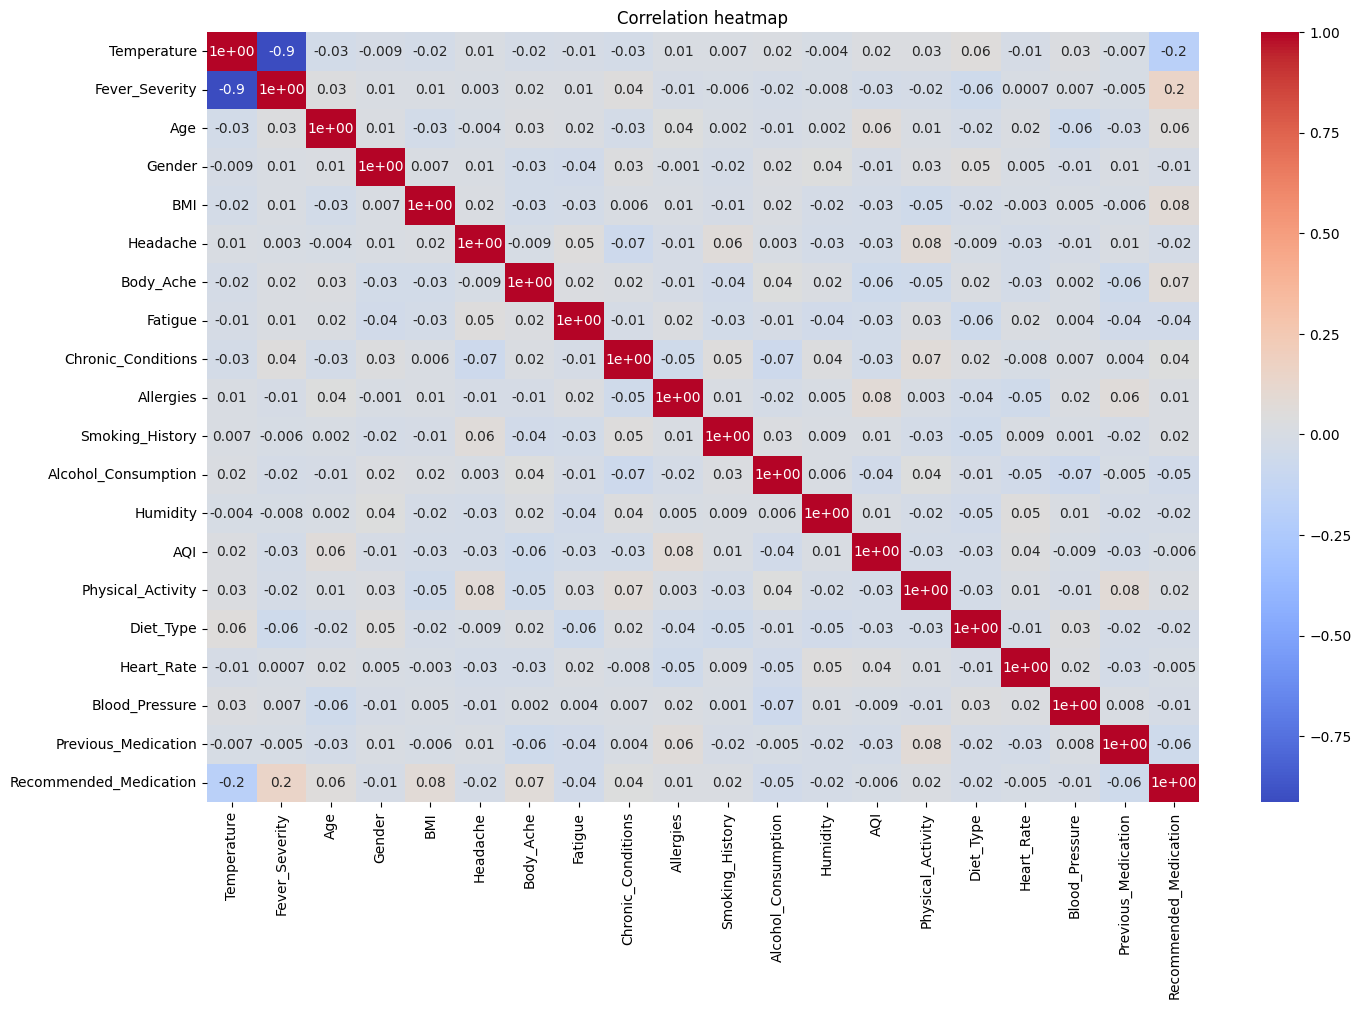

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix=Data.corr()
print(corr_matrix)

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt="0.0")
plt.title("Correlation heatmap")


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
x=Data[['Age','Fever_Severity','Chronic_Conditions','Body_Ache','BMI']] #Features always 2 dimension
y=Data['Recommended_Medication'] #Target 1 dimension


In [ ]:
x.ndim

2

In [ ]:
x

,Age,Fever_Severity,Chronic_Conditions,Body_Ache,BMI
0,88,2,0,1,60
1,93,1,1,0,86
2,91,2,0,0,98
3,65,0,0,1,7
4,27,0,1,1,30
...,...,...,...,...,...
995,58,0,0,1,41
996,73,2,1,1,1
997,7,2,0,1,116
998,86,0,0,0,72


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x)

StandardScaler()

In [ ]:
standard_data=scalar.transform(x)

In [ ]:
X=standard_data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 5), (300, 5), (700,), (300,))

In [ ]:
model = LogisticRegression()  # Create a LogisticRegression model object
model.fit(x_train, y_train)  # Train the model using the training data

LogisticRegression()

In [ ]:
prediction=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

tranining_accuracy=accuracy_score(model.predict(x_train),y_train)
testing_accuracy=accuracy_score(prediction,y_test)

print(f"Training Accuracy: {tranining_accuracy*100:.2f}%")
print(f"Testing Accuracy: {testing_accuracy*100:.2f}%")

Training Accuracy: 79.57%
Testing Accuracy: 81.33%


In [ ]:
import numpy as np

# Labels mapping after encoding
labels = {0: 'Ibuprofen', 1: 'Paracetamol', 2: 'Aspirin'}

# Function to take user input and predict
def predict_medication():
    print("Please enter the following details:")
    fever_severity = float(input("Fever Severity (0-10 scale): "))
    bmi = float(input("BMI (Body Mass Index): "))
    body_ache = int(input("Body Ache (0 for No, 1 for Yes): "))
    age = int(input("Age: "))
    chronic_conditions = int(input("Chronic Conditions (0 for No, 1 for Yes): "))

    # Creating the input array
    user_input = np.array([[fever_severity, bmi, body_ache, age, chronic_conditions]])

    # Standardizing the input using the same scalar
    standardized_input = scalar.transform(user_input)

    # Predicting the recommended medication
    prediction = model.predict(standardized_input)

    # Getting the medication name
    recommended_medication = labels[prediction[0]]

    print("\nRecommended Medication: ", recommended_medication)

# Call the function
predict_medication()


Please enter the following details:
Fever Severity (0-10 scale): 9
BMI (Body Mass Index): 25
Body Ache (0 for No, 1 for Yes): 1
Age: 25
Chronic Conditions (0 for No, 1 for Yes): 1

Recommended Medication:  Paracetamol


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
